# Análise preliminar

Aqui procuramos, a partir dos dados já tratados disponibilizados pelos autores, reproduzir a análise exploratória apresentada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

In [2]:
# checando tipo de encoding
# !file -I ../data/dados_brutos/sinistros/sinistros_2015-2021.csv

# checando erro na linha 928, vê-se que o delimitador é ';'
# with open("../data/dados_brutos/sinistros/sinistros_2015-2021.csv", encoding="iso-8859-1") as f:
#     for i, line in enumerate(f, 1):
#         if i == 928:
#             print(line)
#             break

df_sinistros_1521 = pd.read_csv("../data/data-unzip/dados_brutos/sinistros/sinistros_2015-2021.csv", encoding="iso-8859-1", sep=';')
df_sinistros_1521.head()

,id_sinistro,tipo_registro,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,hora_sinistro,logradouro,numero_logradouro,...,tp_sinistro_colisao_traseira,tp_sinistro_colisao_lateral,tp_sinistro_colisao_transversal,tp_sinistro_colisao_outros,tp_sinistro_choque,tp_sinistro_capotamento,tp_sinistro_engavetamento,tp_sinistro_tombamento,tp_sinistro_outros,tp_sinistro_nao_disponivel
0,2501575,SINISTRO FATAL,21/12/2014,2014,12,21,2014/12,20:00,RUA MANOEL MACHADO PEREIRA,905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2456933,SINISTRO FATAL,23/12/2014,2014,12,23,2014/12,NaN,AVENIDA VINTE E TRES,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
2,2463759,SINISTRO FATAL,26/12/2014,2014,12,26,2014/12,06:52,AVENIDA REBOUCAS,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2487781,SINISTRO FATAL,28/12/2014,2014,12,28,2014/12,14:30,ESTRADA EGÍLIO VITORELLO,589.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2489730,SINISTRO FATAL,28/12/2014,2014,12,28,2014/12,NaN,AVENIDA SAO PAULO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S


In [3]:
df_sinistros_2225 = pd.read_csv("../data/data-unzip/dados_brutos/sinistros/sinistros_2022-2025.csv", encoding="iso-8859-1", sep=';')

df_sinistros_2225['tp_veiculo_nao_disponivel'].head()
df_sinistros_2225.columns

Index(['id_sinistro', 'tipo_registro', 'data_sinistro', 'ano_sinistro',
       'mes_sinistro', 'dia_sinistro', 'ano_mes_sinistro', 'hora_sinistro',
       'logradouro', 'numero_logradouro', 'tipo_via', 'latitude', 'longitude',
       'municipio', 'regiao_administrativa', 'tp_veiculo_bicicleta',
       'tp_veiculo_caminhao', 'tp_veiculo_motocicleta',
       'tp_veiculo_nao_disponivel', 'tp_veiculo_onibus', 'tp_veiculo_outros',
       'tp_veiculo_automovel', 'gravidade_nao_disponivel', 'gravidade_leve',
       'gravidade_fatal', 'gravidade_ileso', 'gravidade_grave',
       'administracao', 'conservacao', 'jurisdicao', 'tipo_acidente_primario',
       'tp_sinistro_atropelamento', 'tp_sinistro_colisao_frontal',
       'tp_sinistro_colisao_traseira', 'tp_sinistro_colisao_lateral',
       'tp_sinistro_colisao_transversal', 'tp_sinistro_colisao_outros',
       'tp_sinistro_choque', 'tp_sinistro_capotamento',
       'tp_sinistro_engavetamento', 'tp_sinistro_tombamento',
       'tp_sinistro_out

In [4]:
df_sinistros = pd.concat([df_sinistros_1521, df_sinistros_2225], ignore_index=True)
df_sinistros.head()
df_sinistros.municipio

0                     CAMPINAS
1                     BARRETOS
2                    SAO PAULO
3                  CARAPICUIBA
4                 PRAIA GRANDE
                  ...         
1208092    SAO JOSE DOS CAMPOS
1208093              SAO PAULO
1208094              SAO PAULO
1208095                VINHEDO
1208096          CARAGUATATUBA
Name: municipio, Length: 1208097, dtype: object

In [5]:
# criar coluna de tipo de transporte

def tipo_transporte(row):
    if row['tp_veiculo_motocicleta'] == 1:
        return 'Motocicleta'
    elif row['tp_veiculo_nao_disponivel'] == 1:
        return 'Não disponível'
    else:
        return 'Outros'
    
df_sinistros['tipo_de_transporte'] = df_sinistros.apply(tipo_transporte, axis=1)

In [6]:
df_sinistros['tipo_de_transporte'].unique()

array(['Não disponível', 'Outros', 'Motocicleta'], dtype=object)

In [7]:
df_sinistros.shape[0] == df_sinistros_1521.shape[0] + df_sinistros_2225.shape[0]

True

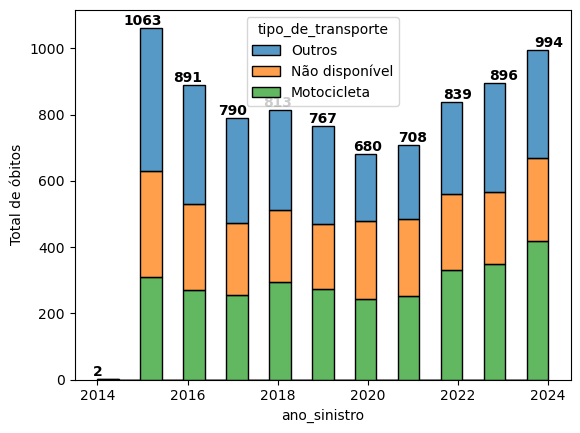

In [8]:
df_obitos_msp = df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025")

# Plot
ax = sns.histplot(data=df_obitos_msp, x='ano_sinistro', hue='tipo_de_transporte', multiple='stack')

# Total por ano
total_ob = df_obitos_msp.groupby('ano_sinistro').size()

# Add text above each year
for year, total in total_ob.items():
    ax.text(year, total, f'{total}', ha="center", va="bottom", fontweight='bold')

plt.ylabel('Total de óbitos')
plt.show()

In [9]:
df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and ano_sinistro < 2025").shape

(51183, 44)

In [10]:
df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025")['tipo_de_transporte']

2                  Outros
5          Não disponível
12            Motocicleta
13                 Outros
17            Motocicleta
                ...      
1133389       Motocicleta
1133669    Não disponível
1134027       Motocicleta
1134028    Não disponível
1134032       Motocicleta
Name: tipo_de_transporte, Length: 8443, dtype: object

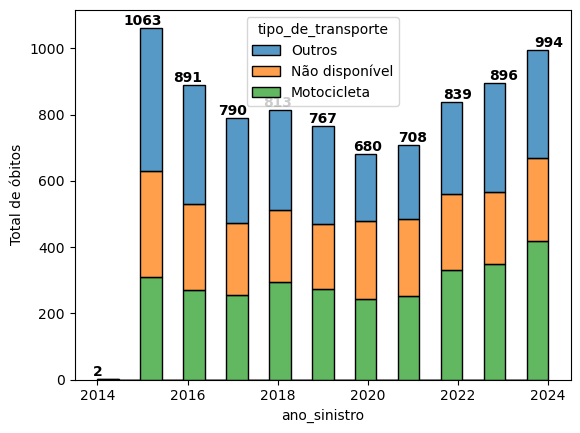

In [11]:
df_obitos_msp = df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025")

# Create plot
ax = sns.histplot(data=df_obitos_msp, x='ano_sinistro', hue='tipo_de_transporte', multiple='stack')

# Get totals per year
totals = df_obitos_msp.groupby('ano_sinistro').size()

# Add text above each year
for year, total in totals.items():
    ax.text(year, total, f'{total}', ha="center", va="bottom", fontweight='bold')

plt.ylabel('Total de óbitos')
plt.show()

In [12]:
df_pessoas_1521 = pd.read_csv("../data/data-unzip/dados_brutos/pessoas/pessoas_2015-2021.csv", encoding="iso-8859-1", sep=';')
df_pessoas_2225 = pd.read_csv("../data/data-unzip/dados_brutos/pessoas/pessoas_2022-2025.csv", encoding="iso-8859-1", sep=';')
df_pessoas = pd.concat([df_pessoas_1521, df_pessoas_2225], ignore_index=True)
df_merge = pd.merge(df_pessoas, df_sinistros[['id_sinistro', 'tipo_de_transporte']], on='id_sinistro', how='left')
df_merge

,id_sinistro,municipio,tipo_via,tipo_veiculo_vitima,sexo,idade,data_obito,gravidade_lesao,tipo_de vítima,faixa_etaria_demografica,...,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,ano_obito,mes_obito,dia_obito,ano_mes_obito,tipo_de_transporte
0,2489730,PRAIA GRANDE,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,30.0,01/01/2015,FATAL,NAO DISPONIVEL,30 a 34,...,28/12/2014,2014,12,28,2014/12,2015.0,1.0,1.0,2015/01,Não disponível
1,2483966,SANTO ANDRE,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,38.0,01/01/2015,FATAL,NAO DISPONIVEL,35 a 39,...,01/01/2015,2015,1,1,2015/01,2015.0,1.0,1.0,2015/01,Não disponível
2,2470532,FERNANDOPOLIS,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,26.0,04/01/2015,FATAL,NAO DISPONIVEL,25 a 29,...,04/01/2015,2015,1,4,2015/01,2015.0,1.0,4.0,2015/01,Não disponível
3,2481481,SAO PAULO,VIAS MUNICIPAIS,PEDESTRE,FEMININO,90.0,06/01/2015,FATAL,PEDESTRE,90 e +,...,06/01/2015,2015,1,6,2015/01,2015.0,1.0,6.0,2015/01,Outros
4,2506869,MOGI GUACU,VIAS MUNICIPAIS,NAO DISPONIVEL,NAO DISPONIVEL,44.0,09/01/2015,FATAL,NAO DISPONIVEL,40 a 44,...,09/01/2015,2015,1,9,2015/01,2015.0,1.0,9.0,2015/01,Não disponível
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653222,2608847,ITAPIRA,VIAS MUNICIPAIS,NaN,MASCULINO,31.0,NaN,NAO DISPONIVEL,CONDUTOR,30 a 34,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Outros
1653223,2596088,SAO PAULO,VIAS MUNICIPAIS,NaN,FEMININO,40.0,NaN,NAO DISPONIVEL,CONDUTOR,40 a 44,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Outros
1653224,2596982,SAO PAULO,VIAS MUNICIPAIS,NaN,FEMININO,42.0,NaN,LEVE,NAO DISPONIVEL,40 a 44,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Motocicleta
1653225,2602909,TEODORO SAMPAIO,VIAS MUNICIPAIS,NaN,FEMININO,53.0,NaN,LEVE,CONDUTOR,50 a 54,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Outros


In [13]:
df_pessoas.columns
df_pessoas['tipo_veiculo_vitima'].unique()

array(['NAO DISPONIVEL', 'PEDESTRE', 'MOTOCICLETA', 'ONIBUS', 'AUTOMOVEL',
       nan, 'CAMINHAO', 'BICICLETA', 'OUTROS', 'Motocicleta', 'Pedestre',
       'Bicicleta', 'Outros'], dtype=object)

In [14]:
totals

ano_sinistro
2014       2
2015    1063
2016     891
2017     790
2018     813
2019     767
2020     680
2021     708
2022     839
2023     896
2024     994
dtype: int64

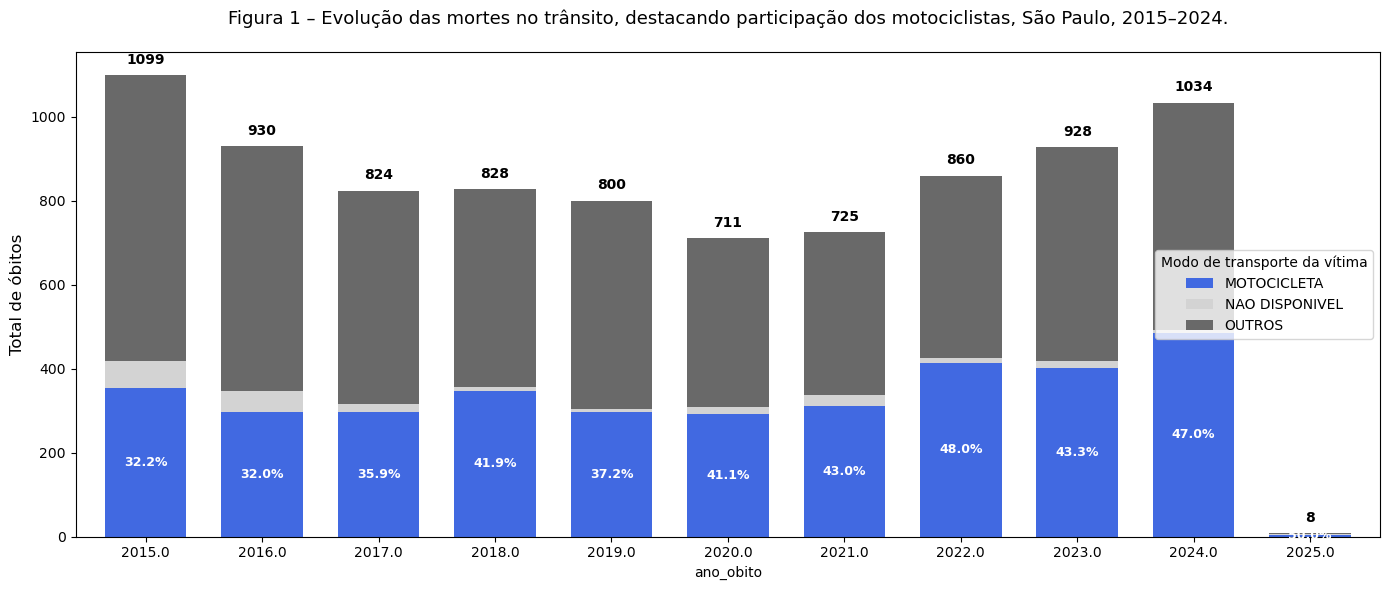

In [15]:
def tipo_transporte(row):
    if row['tipo_veiculo_vitima'] in ['MOTOCICLETA', 'OUTROS', 'NAO DISPONIVEL']:
        return row['tipo_veiculo_vitima']
    else:
        return 'OUTROS'
    
df_merge['tipo_veiculo_vitima2'] = df_merge.apply(tipo_transporte, axis=1)

df_antes = df_merge.query("gravidade_lesao == 'FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025 and ano_sinistro > 2014 and tipo_veiculo_vitima2 in ['MOTOCICLETA', 'OUTROS', 'NAO DISPONIVEL']")

# Agrupar por ano e tipo de transporte
df_grouped = df_antes.groupby(['ano_obito', 'tipo_veiculo_vitima2']).size().reset_index(name='count')

# Pivot to get years as index and transport types as columns
df_pivot = df_grouped.pivot(index='ano_obito', columns='tipo_veiculo_vitima2', values='count').fillna(0)

# Create stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 6), 
                   color=['#4169E1', '#D3D3D3', '#696969'],
                   width=0.7)

# Add total values on top of bars
totals = df_pivot.sum(axis=1)
for i, (year, total) in enumerate(totals.items()):
    ax.text(i, total + 20, f'{int(total)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add percentages inside blue bars (Motocicleta)
for i, (year, row) in enumerate(df_pivot.iterrows()):
    motorcycle_pct = (row['MOTOCICLETA'] / totals[year]) * 100
    motorcycle_height = row['MOTOCICLETA'] / 2  # Middle of motorcycle bar
    ax.text(i, motorcycle_height, f'{motorcycle_pct:.1f}%', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=9)

ax.set_ylabel('Total de óbitos', fontsize=12)
ax.set_title('Figura 1 – Evolução das mortes no trânsito, destacando participação dos motociclistas, São Paulo, 2015–2024.', 
             fontsize=13, pad=20)
ax.legend(title='Modo de transporte da vítima', loc='center right', frameon=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../images/re_figure1.png')
plt.show()

## Figura 3 – Evolução da implementação da Faixa Azul (km acumulados), 2022–2025

Nova base, agora de implementação da faixa azul

In [16]:
df_faixa_azul = pd.read_csv("../data/data-unzip/dados_brutos/faixa_azul.csv", encoding="iso-8859-1")
df_faixa_azul

,id_osm,data_implementacao
0,61819124,2022-01-01
1,227335672,2022-01-01
2,227342532,2022-01-01
3,273593640,2022-01-01
4,286269721,2022-01-01
...,...,...
1043,941842697,2025-01-01
1044,941850958,2025-01-01
1045,941852309,2025-01-01
1046,941868874,2025-01-01


In [17]:

df_faixa_group = df_faixa_azul.groupby(['data_implementacao', 'id_osm']).size().reset_index(name='count')
df_faixa_bar = df_faixa_group.pivot(index='data_implementacao', columns='id_osm', values='count').fillna(0)
df_faixa_bar
# ax = df_faixa_bar.plot(kind='bar', stacked=True, figsize=(14, 6), 
#                    color=['#4169E1', '#D3D3D3', '#696969'],
#                    width=0.7)
# plt.show()

id_osm,4328549,4330744,4331361,4331371,4331374,4331384,4331461,4331470,4331477,4331480,...,1172641099,1264623498,1264623499,1269000895,1303520446,1303520447,1303539923,1339485320,1339485321,1359862719
data_implementacao,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-04-01,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2024-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dados_osm = gpd.read_file("../data/data-unzip/dados_brutos/dado_osm.gpkg")
dados_osm.id_osm = dados_osm.id_osm.astype('int64')
dados_osm.head()

,id_osm,logradouro,logradouro_alt1,logradouro_alt2,logradouro_alt3,logradouro_ref,tipo_via,faixas,limite_velocidade,limite_velocidade_pesados,motocicleta,mao_unica,superficie,elevado,comprimento,geometry
0,4273875,Marginal Pinheiros (Expressa),None,None,None,SP-015,motorway,2,90,60,no,yes,asphalt,None,92.757033,"LINESTRING (-46.72086 -23.65362, -46.72121 -23..."
1,4273889,Avenida Nações Unidas,None,None,None,None,trunk,2,60,50,None,yes,asphalt,None,132.270889,"LINESTRING (-46.72086 -23.65362, -46.72114 -23..."
2,4312745,Rodovia dos Bandeirantes,None,None,None,SP-348,motorway,5,120,90,None,yes,paved,None,3513.826989,"LINESTRING (-46.80318 -23.35107, -46.8017 -23...."
3,4312746,Rodovia dos Bandeirantes,None,None,None,SP-348,motorway,5,120,90,None,yes,paved,None,1265.751811,"LINESTRING (-46.76392 -23.41746, -46.7654 -23...."
4,4317930,Rodovia Presidente Dutra,Via Dutra,None,None,SP-060;BR-116,motorway,2,110,None,None,yes,asphalt,None,440.100616,"LINESTRING (-46.5492 -23.49111, -46.54566 -23...."


In [19]:
dados_osm.id_osm

0            4273875
1            4273889
2            4312745
3            4312746
4            4317930
             ...    
218943    1409456401
218944    1409456402
218945    1409456403
218946    1409456404
218947    1409459226
Name: id_osm, Length: 218948, dtype: int64

In [20]:
df_faixa_osm = pd.merge(df_faixa_azul, dados_osm.filter(regex='^id_osm$|^logradouro|^comprimento$'), on='id_osm', how='left')
df_faixa_osm.head()

,id_osm,data_implementacao,logradouro,logradouro_alt1,logradouro_alt2,logradouro_alt3,logradouro_ref,comprimento
0,61819124,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,1019.749105
1,227335672,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,143.368901
2,227342532,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,24.705270
3,273593640,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,410.948431
4,286269721,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,409.314308


In [21]:
with np.printoptions(threshold=np.inf):
    print(df_faixa_osm.logradouro.unique())

['Avenida Vinte e Três de Maio' 'Avenida dos Bandeirantes'
 "Avenida Afonso D'Escragnole Taunay" 'Avenida Moreira Guimarães'
 'Avenida Rubem Berta' 'Avenida Prestes Maia' 'Avenida Santos Dumont'
 'Avenida das Nações Unidas' 'Avenida Sumaré' 'Rua Miguel Yunes'
 'Avenida Paulo VI' 'Avenida Luiz Dumont Villares' 'Avenida Jacu-Pêssego'
 'Avenida Zaki Narchi' 'Avenida do Estado' 'Avenida Brigadeiro Faria Lima'
 'Túnel São João Paulo II' 'Avenida Washington Luís'
 'Complexo Viário Ayrton Senna' 'Rua Santa Eulália'
 'Avenida Eliseu de Almeida' 'Avenida Doutor Gastão Vidigal'
 'Avenida Bráz Leme' 'Complexo Viário Maria Maluf'
 'Viaduto Ministro Aliomar Baleeiro' 'Elevado Presidente João Goulart'
 'Avenida do Cursino' 'Avenida Presidente Tancredo Neves'
 'Avenida Professor Luiz Ignácio Anhaia Mello'
 'Avenida Salim Farah Maluf (Expressa)' 'Avenida Salim Farah Maluf'
 'Avenida Aricanduva' 'Avenida Aricanduva via Expressa'
 'Avenida Aricanduva (Expressa)' nan 'Avenida Dom Helder Câmara'
 'Avenida

In [22]:
nomes_logradouros = pd.DataFrame({
                    'logradouro': ['Avenida Vinte e Três de Maio', 'Avenida dos Bandeirantes',
                               "Avenida Afonso D'Escragnole Taunay", 'Avenida Moreira Guimarães',
                               'Avenida Rubem Berta', 'Avenida Prestes Maia', 'Avenida Santos Dumont',
                               'Avenida das Nações Unidas', 'Avenida Sumaré', 'Rua Miguel Yunes',
                               'Avenida Paulo VI', 'Avenida Luiz Dumont Villares', 'Avenida Jacu-Pêssego',
                               'Avenida Zaki Narchi', 'Avenida do Estado', 'Avenida Brigadeiro Faria Lima',
                               'Túnel São João Paulo II', 'Avenida Washington Luís',
                               'Complexo Viário Ayrton Senna', 'Rua Santa Eulália',
                               'Avenida Eliseu de Almeida', 'Avenida Doutor Gastão Vidigal',
                               'Avenida Bráz Leme', 'Complexo Viário Maria Maluf',
                               'Viaduto Ministro Aliomar Baleeiro', 'Elevado Presidente João Goulart',
                               'Avenida do Cursino', 'Avenida Presidente Tancredo Neves',
                               'Avenida Professor Luiz Ignácio Anhaia Mello',
                               'Avenida Salim Farah Maluf (Expressa)', 'Avenida Salim Farah Maluf',
                               'Avenida Aricanduva', 'Avenida Aricanduva via Expressa',
                               'Avenida Aricanduva (Expressa)', 'Avenida Dom Helder Câmara',
                               'Avenida Calim Eid', 'Avenida Governador Carvalho Pinto',
                               'Avenida Comendador Martinelli', 'Avenida Inajar de Souza', 'Rua Vergueiro',
                               'Avenida Senador Teotônio Vilela', 'Avenida Escola Politécnica',
                               'Ponte das Bandeiras', 'Avenida Tiradentes', 'Avenida 23 de Maio',
                               'Avenida Doutor Ricardo Jafet', 'Avenida Professor Abraão de Morais',
                               'Rua Sapetuba'],
                    'padrao': ['VINTE E TRES MAIO', 'BANDEIRANTES',
                               'AFONSO D ESCRAGNOLE TAUNAY', 'MOREIRA GUIMARAES',
                               'RUBEM BERTA', 'PRESTES MAIA', 'SANTOS DUMONT',
                               'NACOES UNIDAS', 'SUMARE', 'MIGUEL YUNES',
                               'PAULO VI', 'LUIZ DUMONT VILLARES', 'JACU PESSEGO',
                               'ZAKI NARCHI', 'ESTADO', 'FARIA LIMA',
                               'JOAO PAULO II', 'WASHINGTON LUIS',
                               'AYRTON SENNA', 'EULALIA',
                               'ELISEU ALMEIDA', 'GASTAO VIDIGAL',
                               'BRAZ LEME', 'MARIA MALUF',
                               'ALIOMAR BALEEIRO', 'ELEVADO JOAO GOULART',
                               'CURSINO', 'TANCREDO NEVES',
                               'LUIS IGNACIO ANHAIA MELLO',
                               'SALIM FARAH MALUF EXPRESSA', 'SALIM FARAH MALUF',
                               'ARICANDUVA', 'ARICANDUVA EXPRESSA',
                               'ARICANDUVA EXPRESSA', 'HELDER CAMARA',
                               'CALIM EID', 'CARVALHO PINTO',
                               'MARTINELLI', 'INAJAR SOUZA', 'VERGUEIRO',
                               'TEOTONIO VILELA', 'ESCOLA POLITECNICA',
                               'BANDEIRAS', 'TIRADENTES', 'VINTE E TRES MAIO',
                               'RICARDO JAFET', 'ABRAAO MORAES',
                               'SAPETUBA']
})


In [23]:
df_faixa_osm = pd.merge(df_faixa_osm, nomes_logradouros, on='logradouro', how='left')
df_faixa_osm

,id_osm,data_implementacao,logradouro,logradouro_alt1,logradouro_alt2,logradouro_alt3,logradouro_ref,comprimento,padrao
0,61819124,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,1019.749105,VINTE E TRES MAIO
1,227335672,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,143.368901,VINTE E TRES MAIO
2,227342532,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,24.705270,VINTE E TRES MAIO
3,273593640,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,410.948431,VINTE E TRES MAIO
4,286269721,2022-01-01,Avenida Vinte e Três de Maio,Avenida 23 de Maio,None,None,None,409.314308,VINTE E TRES MAIO
...,...,...,...,...,...,...,...,...,...
1043,941842697,2025-01-01,Avenida das Nações Unidas,None,None,None,SP-015,108.590814,NACOES UNIDAS
1044,941850958,2025-01-01,Avenida das Nações Unidas,None,None,None,SP-015,269.277346,NACOES UNIDAS
1045,941852309,2025-01-01,Avenida das Nações Unidas,None,None,None,SP-015,49.176321,NACOES UNIDAS
1046,941868874,2025-01-01,Avenida das Nações Unidas,None,None,None,SP-015,55.786123,NACOES UNIDAS


In [24]:
df_faixa_group = df_faixa_osm.groupby(['data_implementacao', 'padrao'])['comprimento'].sum().reset_index(name='sum')
df_faixa_bar = df_faixa_group.pivot(index='data_implementacao', columns='padrao', values='sum').fillna(0)
df_faixa_bar = df_faixa_bar/1000
df_faixa_bar

padrao,ABRAAO MORAES,AFONSO D ESCRAGNOLE TAUNAY,ALIOMAR BALEEIRO,ARICANDUVA,ARICANDUVA EXPRESSA,AYRTON SENNA,BANDEIRANTES,BANDEIRAS,BRAZ LEME,CALIM EID,...,SANTOS DUMONT,SAPETUBA,SUMARE,TANCREDO NEVES,TEOTONIO VILELA,TIRADENTES,VERGUEIRO,VINTE E TRES MAIO,WASHINGTON LUIS,ZAKI NARCHI
data_implementacao,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.460843,0.000000,0.000000
2022-10-01,0.000000,4.494431,0.000000,0.000000,0.000000,0.000000,11.301291,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.369679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.336585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.586251
2024-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.870984,0.000000,0.000000,0.000000,0.000000,...,2.398537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953032,0.000000
2024-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.074487,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-06-01,0.000000,0.000000,0.256428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.219496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
color_map = {
    'VINTE E TRES MAIO': (0.365, 0.055, 0.577),  # Purple
    'BANDEIRANTES': (0.090, 0.004, 0.577),  # Dark blue
    'AFONSO D ESCRAGNOLE TAUNAY': (0.071, 0.196, 0.577),  # Blue
    'RUBEM BERTA': (0.216, 0.494, 0.588),  # Teal
    'PRESTES MAIA': (0.263, 0.592, 0.416),  # Forest green
    'SUMARE': (0.263, 0.592, 0.196),  # Lime green
    'PAULO VI': (0.322, 0.592, 0.165),  # Olive green
    'NACOES UNIDAS': (0.521, 0.596, 0.177),  # Olive
    'MIGUEL YUNES': (0.573, 0.408, 0.129),  # Saddle brown
    'ZAKI NARCHI': (0.549, 0.153, 0.071),  # Dark red
    'LUIZ DUMONT VILLARES': (0.549, 0.102, 0.208),  # Maroon
    'JACU PESSEGO': (0.973, 0.828, 0.380),  # Gold
    'FARIA LIMA': (0.965, 0.769, 0.271),  # Yellow
    'ESTADO': (0.318, 0.455, 0.965),  # Blue
    'WASHINGTON LUIS': (0.122, 0.274, 0.961),  # Medium blue
    'EULALIA': (0.263, 0.592, 0.780),  # Turquoise
    'AYRTON SENNA': (0.361, 0.788, 0.612),  # Spring green
    'GASTAO VIDIGAL': (0.361, 0.788, 0.302),  # Chartreuse
    'ELISEU ALMEIDA': (0.404, 0.788, 0.231),  # Green-yellow
    'BRAZ LEME': (0.643, 0.796, 0.247),  # Yellow-green
    'TANCREDO NEVES': (0.769, 0.608, 0.200),  # Goldenrod
    'MARIA MALUF': (0.663, 0.663, 0.663),  # Dark gray
    'LUIS IGNACIO ANHAIA MELLO': (0.643, 0.796, 0.247),  # Light green
    'ELEVADO JOAO GOULART': (0.769, 0.608, 0.200),  # Peru
    'CURSINO': (0.361, 0.396, 0.373),  # Dim gray
    'ALIOMAR BALEEIRO': (0.886, 0.784, 0.482),  # Wheat
    'VERGUEIRO': (0.627, 0.180, 0.384),  # Dark magenta
    'SALIM FARAH MALUF EXPRESSA': (0.353, 0.177, 0.459),  # Indigo
    'SALIM FARAH MALUF': (0.816, 0.871, 0.733),  # Alice blue
    'MARTINELLI': (0.216, 0.114, 0.314),  # Midnight blue
    'INAJAR SOUZA': (0.863, 0.694, 0.451),  # Beige
    'HELDER CAMARA': (0.467, 0.400, 0.631),  # Lavender
    'CARVALHO PINTO': (0.796, 0.573, 0.396),  # Burlywood
    'CALIM EID': (0.726, 0.345, 0.204),  # Sienna
    'ARICANDUVA': (0.537, 0.298, 0.169),  # Saddle brown
    'ARICANDUVA EXPRESSA': (0.510, 0.482, 0.549),  # Gray
    'TIRADENTES': (0.796, 0.596, 0.655),  # Light pink
    'TEOTONIO VILELA': (0.529, 0.832, 0.467),  # Light green
    'MOREIRA GUIMARAES': (0.447, 0.686, 0.851),  # Sky blue
    'SANTOS DUMONT': (0.463, 0.161, 0.396),  # Rebecca purple
    'JOAO PAULO II': (0.682, 0.404, 0.255),  # Sienna
    'ESCOLA POLITECNICA': (0.306, 0.408, 0.506),  # Slate gray
    'BANDEIRAS': (0.933, 0.902, 0.573),  # Light yellow
    'SAPETUBA': (0.486, 0.604, 0.373),  # Olive drab
    'RICARDO JAFET': (0.745, 0.282, 0.227),  # Red
    'ABRAAO MORAES': (0.314, 0.314, 0.965)  # Royal blue
}

In [26]:
first_appearance = {}
for col in df_faixa_bar.columns:
    # Get all rows where this column has non-zero values
    nonzero_mask = df_faixa_bar[col] > 0
    if nonzero_mask.any():  # If column has any non-zero values
        # Get the position of the FIRST True value
        first_appearance[col] = nonzero_mask.idxmax()

# Sort columns by first appearance (earliest row first)
sorted_cols = sorted(first_appearance.keys(), 
                     key=lambda col: df_faixa_bar.index.get_loc(first_appearance[col]))
sorted_cols = [col for col in sorted_cols if col in first_appearance]

# Reorder dataframe columns by first appearance
df_ordered = df_faixa_bar[sorted_cols]
df_ordered

padrao,VINTE E TRES MAIO,AFONSO D ESCRAGNOLE TAUNAY,BANDEIRANTES,MOREIRA GUIMARAES,PRESTES MAIA,RUBEM BERTA,SANTOS DUMONT,MIGUEL YUNES,NACOES UNIDAS,PAULO VI,...,SALIM FARAH MALUF,SALIM FARAH MALUF EXPRESSA,VERGUEIRO,BANDEIRAS,ESCOLA POLITECNICA,TEOTONIO VILELA,TIRADENTES,ABRAAO MORAES,RICARDO JAFET,SAPETUBA
data_implementacao,,,,,,,,,,,,,,,,,,,,,
2022-01-01,5.460843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2022-10-01,0.000000,4.494431,11.301291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2023-10-01,0.000000,0.000000,0.000000,0.756680,0.932244,1.845830,0.369679,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2023-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.196222,6.553060,1.843148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2023-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2024-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2024-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.398537,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2024-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2024-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


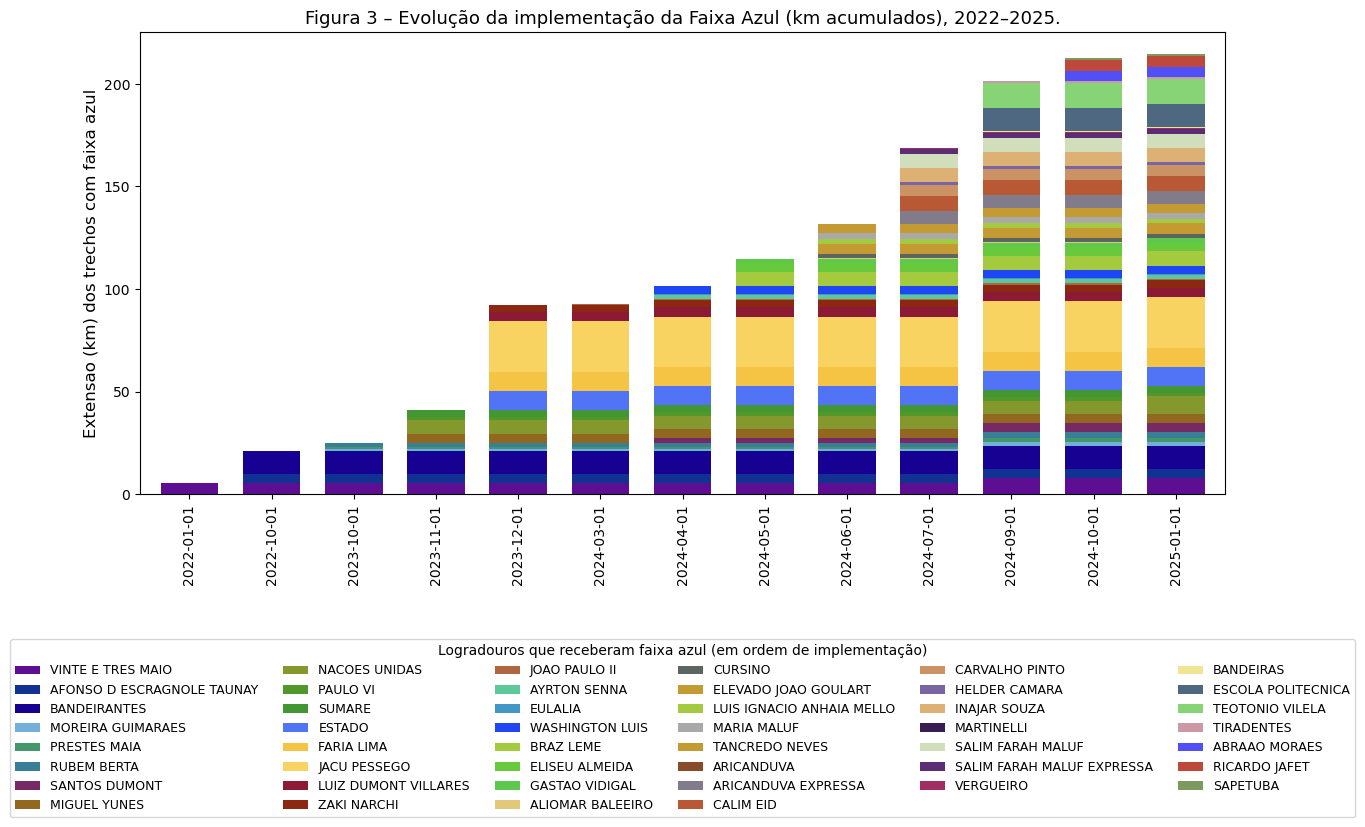

In [27]:
df_faixa_cum = df_ordered.cumsum()

ax = df_faixa_cum.plot(kind='bar', stacked=True, figsize=(14, 6), color = color_map,
                   width=0.7)

ax.set_title('Figura 3 – Evolução da implementação da Faixa Azul (km acumulados), 2022–2025.', fontsize=13)
ax.set_xlabel('')
ax.set_ylabel('Extensao (km) dos trechos com faixa azul', fontsize=12)

ax.legend(title= 'Logradouros que receberam faixa azul (em ordem de implementação)', loc='upper center', bbox_to_anchor=(0.5, -0.30), 
          ncol=6, frameon=True, fontsize=9)

plt.savefig('../images/re_figure3.png')
plt.show()